# Part 1: LSTM

11812804 董正

## Task 1: Implementation

See [lstm.py](lstm.py) and [train.py](train.py).

LSTM Forward:

Input: $g^t=\tanh(W_{gx}x^t+W_{gh}h^{t-1}+b_g)$

Input Gate: $i^t=\mathrm{sigmoid}(W_{ix}x^t+W_{ih}h^{t-1}+b_i)$

Forget Gate: $f^t=\mathrm{sigmoid}(W_{fx}x^t+W_{fh}h^{t-1}+b_f)$

Output Gate: $o^t=\mathrm{sigmoid}(W_{ox}x^t+W_{oh}h^{t-1}+b_o)$

Cell State: $c^t=g^t\odot i^t+c^{t-1}\odot f^t$

Hidden: $h^t=\tanh(c^t)\odot o^t$

Output: $\hat y^t=\mathrm{softmax}(W_{ph}h^t+b_p)$

---

For training, since the API of RNN and LSTM are exactly same in my implementation, the training code is same as that in assignment 2.

The usage is shown as following:

In [2]:
%run train.py -h

usage: train.py [-h] [--input_length INPUT_LENGTH] [--input_dim INPUT_DIM]
                [--num_classes NUM_CLASSES] [--num_hidden NUM_HIDDEN]
                [--learning_rate LEARNING_RATE] [--batch_size BATCH_SIZE]
                [--train_steps TRAIN_STEPS] [--eval_steps EVAL_STEPS]
                [--max_norm MAX_NORM] [--eval_freq EVAL_FREQ]
                [--num_workers NUM_WORKERS] [--visual_model] [--quiet] [--gpu]

optional arguments:
  -h, --help            show this help message and exit
  --input_length INPUT_LENGTH
                        Length of an input sequence
  --input_dim INPUT_DIM
                        Dimensionality of input sequence
  --num_classes NUM_CLASSES
                        Dimensionality of output sequence
  --num_hidden NUM_HIDDEN
                        Number of hidden units in the model
  --learning_rate LEARNING_RATE, -l LEARNING_RATE
                        Learning rate.
  --batch_size BATCH_SIZE, -b BATCH_SIZE
                        Batc

## Task 2: Comparison on different palindrome length

$T=5$, train 1000 steps, use another 50 batches for evaluation.

The model reached 100% accuracy after around 550 epochs of training.

---Using CPU---
2022-05-16 11:41:07.745131 Step 50 	Train Loss = 2.22367 Train acc = 0.214  Eval Loss = 2.16918 Eval acc = 0.259 
2022-05-16 11:41:09.511374 Step 100 	Train Loss = 2.10795 Train acc = 0.353  Eval Loss = 2.08606 Eval acc = 0.378 
2022-05-16 11:41:11.390369 Step 150 	Train Loss = 2.02452 Train acc = 0.462  Eval Loss = 2.06664 Eval acc = 0.354 
2022-05-16 11:41:13.688869 Step 200 	Train Loss = 1.91241 Train acc = 0.614  Eval Loss = 2.10265 Eval acc = 0.273 
2022-05-16 11:41:15.998754 Step 250 	Train Loss = 1.84609 Train acc = 0.678  Eval Loss = 1.81971 Eval acc = 0.653 
2022-05-16 11:41:17.779996 Step 300 	Train Loss = 1.77007 Train acc = 0.763  Eval Loss = 1.78906 Eval acc = 0.702 
2022-05-16 11:41:19.796495 Step 350 	Train Loss = 1.70710 Train acc = 0.832  Eval Loss = 1.91936 Eval acc = 0.486 
2022-05-16 11:41:21.575623 Step 400 	Train Loss = 1.67463 Train acc = 0.846  Eval Loss = 1.59495 Eval acc = 0.912 
2022-05-16 11:41:23.561596 Step 450 	Train Loss = 1.65955 Train a

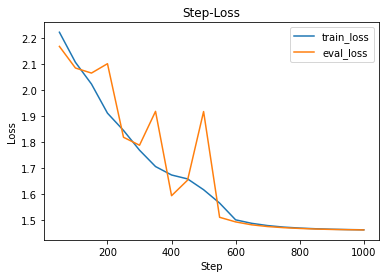

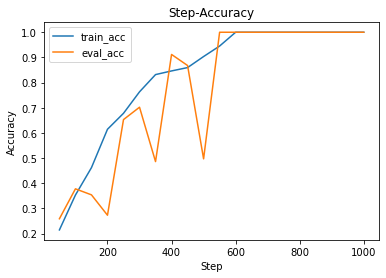

In [3]:
%run train.py -s 1000 -e 50 -f 50 -v -b 128 --input_length 5

Comparison on $T=3..15$

In [4]:
%run train.py -s 1000 -e 50 -f 50 -b 128 --input_length 3

---Using CPU---
2022-05-16 11:41:44.109200 Step 50 	Train Loss = 2.19176 Train acc = 0.268  Eval Loss = 2.08555 Eval acc = 0.433 
2022-05-16 11:41:45.520440 Step 100 	Train Loss = 2.03026 Train acc = 0.517  Eval Loss = 1.96985 Eval acc = 0.513 
2022-05-16 11:41:46.807983 Step 150 	Train Loss = 1.91237 Train acc = 0.691  Eval Loss = 1.86239 Eval acc = 0.803 
2022-05-16 11:41:48.125460 Step 200 	Train Loss = 1.80153 Train acc = 0.842  Eval Loss = 1.73867 Eval acc = 0.902 
2022-05-16 11:41:49.318271 Step 250 	Train Loss = 1.71883 Train acc = 0.891  Eval Loss = 1.71802 Eval acc = 0.888 
2022-05-16 11:41:50.796317 Step 300 	Train Loss = 1.66712 Train acc = 0.891  Eval Loss = 1.61292 Eval acc = 0.960 
2022-05-16 11:41:52.169644 Step 350 	Train Loss = 1.62418 Train acc = 0.934  Eval Loss = 1.60152 Eval acc = 0.953 
2022-05-16 11:41:53.585856 Step 400 	Train Loss = 1.58428 Train acc = 0.974  Eval Loss = 1.54320 Eval acc = 1.000 
2022-05-16 11:41:54.982123 Step 450 	Train Loss = 1.55839 Train a

In [5]:
%run train.py -s 1000 -e 50 -f 50 -b 128 --input_length 4

---Using CPU---
2022-05-16 11:42:10.812787 Step 50 	Train Loss = 2.20819 Train acc = 0.242  Eval Loss = 2.12046 Eval acc = 0.375 
2022-05-16 11:42:12.446420 Step 100 	Train Loss = 2.07531 Train acc = 0.401  Eval Loss = 2.00105 Eval acc = 0.502 
2022-05-16 11:42:14.087031 Step 150 	Train Loss = 1.99182 Train acc = 0.515  Eval Loss = 1.92962 Eval acc = 0.592 
2022-05-16 11:42:15.792471 Step 200 	Train Loss = 1.87530 Train acc = 0.687  Eval Loss = 1.81406 Eval acc = 0.802 
2022-05-16 11:42:17.340331 Step 250 	Train Loss = 1.77697 Train acc = 0.805  Eval Loss = 1.71366 Eval acc = 0.867 
2022-05-16 11:42:18.777489 Step 300 	Train Loss = 1.68385 Train acc = 0.865  Eval Loss = 1.64709 Eval acc = 0.891 
2022-05-16 11:42:20.221625 Step 350 	Train Loss = 1.68834 Train acc = 0.829  Eval Loss = 1.59137 Eval acc = 0.918 
2022-05-16 11:42:21.690697 Step 400 	Train Loss = 1.62649 Train acc = 0.894  Eval Loss = 1.56577 Eval acc = 0.996 
2022-05-16 11:42:23.263490 Step 450 	Train Loss = 1.62336 Train a

In [6]:
%run train.py -s 1000 -e 50 -f 50 -b 128 --input_length 6

---Using CPU---
2022-05-16 11:42:43.523310 Step 50 	Train Loss = 2.24462 Train acc = 0.184  Eval Loss = 2.15287 Eval acc = 0.282 
2022-05-16 11:42:45.387325 Step 100 	Train Loss = 2.13330 Train acc = 0.318  Eval Loss = 2.11756 Eval acc = 0.318 
2022-05-16 11:42:47.247351 Step 150 	Train Loss = 2.06024 Train acc = 0.410  Eval Loss = 1.99262 Eval acc = 0.520 
2022-05-16 11:42:49.097403 Step 200 	Train Loss = 1.97250 Train acc = 0.524  Eval Loss = 1.98876 Eval acc = 0.412 
2022-05-16 11:42:50.921526 Step 250 	Train Loss = 1.86747 Train acc = 0.652  Eval Loss = 1.75251 Eval acc = 0.831 
2022-05-16 11:42:52.777562 Step 300 	Train Loss = 1.79380 Train acc = 0.728  Eval Loss = 1.71075 Eval acc = 0.834 
2022-05-16 11:42:54.628613 Step 350 	Train Loss = 1.73793 Train acc = 0.779  Eval Loss = 1.66761 Eval acc = 0.865 
2022-05-16 11:42:56.543490 Step 400 	Train Loss = 1.69548 Train acc = 0.818  Eval Loss = 1.60428 Eval acc = 0.938 
2022-05-16 11:42:58.425458 Step 450 	Train Loss = 1.66873 Train a

In [7]:
%run train.py -s 1000 -e 50 -f 50 -b 128 --input_length 7

---Using CPU---
2022-05-16 11:43:21.166642 Step 50 	Train Loss = 2.25646 Train acc = 0.174  Eval Loss = 2.17282 Eval acc = 0.305 
2022-05-16 11:43:23.202197 Step 100 	Train Loss = 2.15707 Train acc = 0.290  Eval Loss = 2.06086 Eval acc = 0.424 
2022-05-16 11:43:25.195867 Step 150 	Train Loss = 2.07776 Train acc = 0.387  Eval Loss = 1.99649 Eval acc = 0.541 
2022-05-16 11:43:27.220452 Step 200 	Train Loss = 2.01585 Train acc = 0.454  Eval Loss = 1.88715 Eval acc = 0.655 
2022-05-16 11:43:29.319838 Step 250 	Train Loss = 1.92805 Train acc = 0.565  Eval Loss = 2.01139 Eval acc = 0.396 
2022-05-16 11:43:31.351404 Step 300 	Train Loss = 1.84312 Train acc = 0.665  Eval Loss = 1.74239 Eval acc = 0.796 
2022-05-16 11:43:33.417878 Step 350 	Train Loss = 1.76989 Train acc = 0.742  Eval Loss = 1.68579 Eval acc = 0.830 
2022-05-16 11:43:35.462411 Step 400 	Train Loss = 1.70974 Train acc = 0.795  Eval Loss = 1.66189 Eval acc = 0.847 
2022-05-16 11:43:37.522900 Step 450 	Train Loss = 1.69810 Train a

In [17]:
%run train.py -s 1000 -e 50 -f 50 -b 128 --input_length 8

---Using CPU---
2022-05-16 12:07:52.456180 Step 50 	Train Loss = 2.29153 Train acc = 0.118  Eval Loss = 2.26822 Eval acc = 0.153 
2022-05-16 12:07:54.819859 Step 100 	Train Loss = 2.19704 Train acc = 0.238  Eval Loss = 2.12670 Eval acc = 0.361 
2022-05-16 12:07:57.056876 Step 150 	Train Loss = 2.12805 Train acc = 0.323  Eval Loss = 2.07108 Eval acc = 0.373 
2022-05-16 12:07:59.368694 Step 200 	Train Loss = 2.06740 Train acc = 0.394  Eval Loss = 1.95979 Eval acc = 0.533 
2022-05-16 12:08:01.694475 Step 250 	Train Loss = 1.98188 Train acc = 0.489  Eval Loss = 1.88431 Eval acc = 0.626 
2022-05-16 12:08:03.962452 Step 300 	Train Loss = 1.92229 Train acc = 0.568  Eval Loss = 1.94069 Eval acc = 0.524 
2022-05-16 12:08:06.277255 Step 350 	Train Loss = 1.83658 Train acc = 0.672  Eval Loss = 1.88202 Eval acc = 0.638 
2022-05-16 12:08:08.608028 Step 400 	Train Loss = 1.76460 Train acc = 0.746  Eval Loss = 1.71525 Eval acc = 0.799 
2022-05-16 12:08:10.939786 Step 450 	Train Loss = 1.70223 Train a

In [9]:
%run train.py -s 1000 -e 50 -f 50 -b 128 --input_length 9

---Using CPU---
2022-05-16 11:44:48.337522 Step 50 	Train Loss = 2.30020 Train acc = 0.101  Eval Loss = 2.28228 Eval acc = 0.128 
2022-05-16 11:44:50.814897 Step 100 	Train Loss = 2.22452 Train acc = 0.211  Eval Loss = 2.20429 Eval acc = 0.216 
2022-05-16 11:44:53.300250 Step 150 	Train Loss = 2.16374 Train acc = 0.284  Eval Loss = 2.07139 Eval acc = 0.419 
2022-05-16 11:44:55.824500 Step 200 	Train Loss = 2.10694 Train acc = 0.350  Eval Loss = 2.16316 Eval acc = 0.269 
2022-05-16 11:44:58.284920 Step 250 	Train Loss = 2.02697 Train acc = 0.443  Eval Loss = 1.92941 Eval acc = 0.566 
2022-05-16 11:45:00.754318 Step 300 	Train Loss = 1.98369 Train acc = 0.484  Eval Loss = 1.99264 Eval acc = 0.449 
2022-05-16 11:45:03.215734 Step 350 	Train Loss = 1.91708 Train acc = 0.580  Eval Loss = 2.08280 Eval acc = 0.323 
2022-05-16 11:45:05.714054 Step 400 	Train Loss = 1.85656 Train acc = 0.634  Eval Loss = 1.82114 Eval acc = 0.678 
2022-05-16 11:45:08.221348 Step 450 	Train Loss = 1.78762 Train a

In [10]:
%run train.py -s 1000 -e 50 -f 50 -b 128 --input_length 10

---Using CPU---
2022-05-16 11:45:38.608085 Step 50 	Train Loss = 2.30178 Train acc = 0.100  Eval Loss = 2.27961 Eval acc = 0.181 
2022-05-16 11:45:41.424553 Step 100 	Train Loss = 2.22559 Train acc = 0.203  Eval Loss = 2.17718 Eval acc = 0.255 
2022-05-16 11:45:44.230051 Step 150 	Train Loss = 2.18420 Train acc = 0.256  Eval Loss = 2.22500 Eval acc = 0.200 
2022-05-16 11:45:47.050507 Step 200 	Train Loss = 2.11681 Train acc = 0.334  Eval Loss = 2.00543 Eval acc = 0.463 
2022-05-16 11:45:49.896897 Step 250 	Train Loss = 2.02778 Train acc = 0.432  Eval Loss = 2.12054 Eval acc = 0.273 
2022-05-16 11:45:52.624600 Step 300 	Train Loss = 1.94167 Train acc = 0.550  Eval Loss = 1.79810 Eval acc = 0.793 
2022-05-16 11:45:55.385218 Step 350 	Train Loss = 1.85166 Train acc = 0.651  Eval Loss = 1.88929 Eval acc = 0.632 
2022-05-16 11:45:58.190715 Step 400 	Train Loss = 1.74775 Train acc = 0.755  Eval Loss = 1.59931 Eval acc = 0.961 
2022-05-16 11:46:00.959312 Step 450 	Train Loss = 1.68242 Train a

In [11]:
%run train.py -s 1000 -e 50 -f 50 -b 128 --input_length 11

---Using CPU---
2022-05-16 11:46:34.351013 Step 50 	Train Loss = 2.30290 Train acc = 0.096  Eval Loss = 2.30292 Eval acc = 0.098 
2022-05-16 11:46:37.365950 Step 100 	Train Loss = 2.29452 Train acc = 0.111  Eval Loss = 2.24464 Eval acc = 0.185 
2022-05-16 11:46:40.367922 Step 150 	Train Loss = 2.21463 Train acc = 0.212  Eval Loss = 2.18440 Eval acc = 0.304 
2022-05-16 11:46:43.398816 Step 200 	Train Loss = 2.16188 Train acc = 0.287  Eval Loss = 2.06245 Eval acc = 0.415 
2022-05-16 11:46:46.487556 Step 250 	Train Loss = 2.08422 Train acc = 0.378  Eval Loss = 2.13907 Eval acc = 0.266 
2022-05-16 11:46:49.523437 Step 300 	Train Loss = 1.99807 Train acc = 0.478  Eval Loss = 1.92700 Eval acc = 0.555 
2022-05-16 11:46:52.584252 Step 350 	Train Loss = 1.94641 Train acc = 0.535  Eval Loss = 1.75977 Eval acc = 0.830 
2022-05-16 11:46:55.563285 Step 400 	Train Loss = 1.81988 Train acc = 0.703  Eval Loss = 1.70376 Eval acc = 0.843 
2022-05-16 11:46:58.564260 Step 450 	Train Loss = 1.79362 Train a

In [12]:
%run train.py -s 1000 -e 50 -f 50 -b 128 --input_length 12

---Using CPU---
2022-05-16 11:47:35.003811 Step 50 	Train Loss = 2.30314 Train acc = 0.100  Eval Loss = 2.30177 Eval acc = 0.094 
2022-05-16 11:47:38.253121 Step 100 	Train Loss = 2.25910 Train acc = 0.167  Eval Loss = 2.20259 Eval acc = 0.209 
2022-05-16 11:47:41.531355 Step 150 	Train Loss = 2.19995 Train acc = 0.241  Eval Loss = 2.24932 Eval acc = 0.136 
2022-05-16 11:47:45.113774 Step 200 	Train Loss = 2.14958 Train acc = 0.297  Eval Loss = 2.06378 Eval acc = 0.427 
2022-05-16 11:47:48.388017 Step 250 	Train Loss = 2.06996 Train acc = 0.383  Eval Loss = 2.09533 Eval acc = 0.302 
2022-05-16 11:47:51.666250 Step 300 	Train Loss = 1.98255 Train acc = 0.491  Eval Loss = 1.91767 Eval acc = 0.582 
2022-05-16 11:47:54.932515 Step 350 	Train Loss = 1.89665 Train acc = 0.595  Eval Loss = 2.03270 Eval acc = 0.397 
2022-05-16 11:47:58.256626 Step 400 	Train Loss = 1.85217 Train acc = 0.637  Eval Loss = 1.92995 Eval acc = 0.517 
2022-05-16 11:48:01.546827 Step 450 	Train Loss = 1.79544 Train a

In [13]:
%run train.py -s 1000 -e 50 -f 50 -b 128 --input_length 13

---Using CPU---
2022-05-16 11:48:41.176845 Step 50 	Train Loss = 2.30308 Train acc = 0.100  Eval Loss = 2.30309 Eval acc = 0.092 
2022-05-16 11:48:44.617644 Step 100 	Train Loss = 2.30272 Train acc = 0.101  Eval Loss = 2.30262 Eval acc = 0.103 
2022-05-16 11:48:48.061435 Step 150 	Train Loss = 2.30288 Train acc = 0.097  Eval Loss = 2.30246 Eval acc = 0.102 
2022-05-16 11:48:51.514200 Step 200 	Train Loss = 2.30259 Train acc = 0.100  Eval Loss = 2.30247 Eval acc = 0.102 
2022-05-16 11:48:54.977937 Step 250 	Train Loss = 2.28880 Train acc = 0.121  Eval Loss = 2.22521 Eval acc = 0.205 
2022-05-16 11:48:58.463616 Step 300 	Train Loss = 2.22914 Train acc = 0.199  Eval Loss = 2.25011 Eval acc = 0.166 
2022-05-16 11:49:01.834601 Step 350 	Train Loss = 2.20224 Train acc = 0.229  Eval Loss = 2.14820 Eval acc = 0.310 
2022-05-16 11:49:05.293351 Step 400 	Train Loss = 2.14374 Train acc = 0.309  Eval Loss = 2.07375 Eval acc = 0.421 
2022-05-16 11:49:08.775040 Step 450 	Train Loss = 2.07126 Train a

In [14]:
%run train.py -s 1000 -e 50 -f 50 -b 128 --input_length 14

---Using CPU---
2022-05-16 11:49:50.713884 Step 50 	Train Loss = 2.30313 Train acc = 0.097  Eval Loss = 2.30304 Eval acc = 0.089 
2022-05-16 11:49:54.410997 Step 100 	Train Loss = 2.30286 Train acc = 0.094  Eval Loss = 2.30263 Eval acc = 0.094 
2022-05-16 11:49:58.150996 Step 150 	Train Loss = 2.30265 Train acc = 0.100  Eval Loss = 2.30263 Eval acc = 0.096 
2022-05-16 11:50:01.890994 Step 200 	Train Loss = 2.30275 Train acc = 0.098  Eval Loss = 2.30266 Eval acc = 0.096 
2022-05-16 11:50:05.620023 Step 250 	Train Loss = 2.30254 Train acc = 0.103  Eval Loss = 2.30276 Eval acc = 0.103 
2022-05-16 11:50:09.327107 Step 300 	Train Loss = 2.30267 Train acc = 0.103  Eval Loss = 2.30287 Eval acc = 0.093 
2022-05-16 11:50:12.995297 Step 350 	Train Loss = 2.30254 Train acc = 0.103  Eval Loss = 2.30280 Eval acc = 0.095 
2022-05-16 11:50:16.646533 Step 400 	Train Loss = 2.30245 Train acc = 0.100  Eval Loss = 2.30313 Eval acc = 0.098 
2022-05-16 11:50:20.337663 Step 450 	Train Loss = 2.30280 Train a

In [15]:
%run train.py -s 1000 -e 50 -f 50 -b 128 --input_length 15

---Using CPU---
2022-05-16 11:51:05.356270 Step 50 	Train Loss = 2.30311 Train acc = 0.093  Eval Loss = 2.30284 Eval acc = 0.092 
2022-05-16 11:51:09.322662 Step 100 	Train Loss = 2.30286 Train acc = 0.097  Eval Loss = 2.30270 Eval acc = 0.097 
2022-05-16 11:51:13.251157 Step 150 	Train Loss = 2.30262 Train acc = 0.102  Eval Loss = 2.30264 Eval acc = 0.098 
2022-05-16 11:51:17.196605 Step 200 	Train Loss = 2.30277 Train acc = 0.099  Eval Loss = 2.30274 Eval acc = 0.097 
2022-05-16 11:51:21.106150 Step 250 	Train Loss = 2.30255 Train acc = 0.103  Eval Loss = 2.30274 Eval acc = 0.103 
2022-05-16 11:51:25.043620 Step 300 	Train Loss = 2.30267 Train acc = 0.101  Eval Loss = 2.30288 Eval acc = 0.093 
2022-05-16 11:51:28.956157 Step 350 	Train Loss = 2.30251 Train acc = 0.105  Eval Loss = 2.30281 Eval acc = 0.095 
2022-05-16 11:51:32.822816 Step 400 	Train Loss = 2.30250 Train acc = 0.100  Eval Loss = 2.30315 Eval acc = 0.098 
2022-05-16 11:51:36.725380 Step 450 	Train Loss = 2.30281 Train a

The first figure is the accuracy curve of RNN that taken from my report of assignment 2.

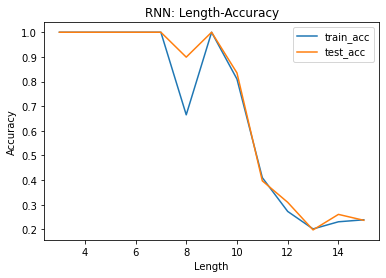

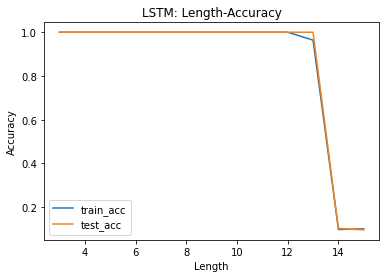

In [6]:
import matplotlib.pyplot as plt

train_acc_list = [1, 1, 1, 1, 1, 0.665, 1, 0.81, 0.41, 0.273, 0.202, 0.231, 0.239]
test_acc_list = [1, 1, 1, 1, 1, 0.899, 1, 0.835, 0.397, 0.310, 0.198, 0.261, 0.237]

plt.plot(range(3, 16), train_acc_list, "-", label="train_acc")
plt.plot(range(3, 16), test_acc_list, "-", label="test_acc")
plt.title("RNN: Length-Accuracy")
plt.xlabel("Length")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# -------------------------------------

train_acc_list = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.964, 0.098, 0.101]
test_acc_list = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.103, 0.096]

plt.plot(range(3, 16), train_acc_list, "-", label="train_acc")
plt.plot(range(3, 16), test_acc_list, "-", label="test_acc")
plt.title("LSTM: Length-Accuracy")
plt.xlabel("Length")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

From the curve above we can see that the accuracy of vanilla RNN drops rapidly when $T>9$.

However, the test accuracy of LSTM remains 100% when $T<=13$, then a big drop on $14$. This indicates that the long term memory of LSTM can improve the performance on longer sequences, but it still has a limit, which is $13$ in this case. The possible solutions for very long sequences is extending it to bi-direction LSTM, or use  attention mechanism.